# Project: Retail Data Analytics
- Project Proposal: Our goal is to provide recommended actions for stores to improve sales for retail store. We will measure the influence of features such as markdowns on the sales and find out factors that impact sales the most. We will also construct and compare the performance of several machine learning models to find the model that yields the best prediction of sales.
- Data Source: https://www.kaggle.com/manjeetsingh/retaildataset
- Project Member: Chenli Qiu, Maro Derhovanessians, Shiyu Ye, Ying Li, Zhiyuan Sun

## 1. Loading and exploring the Dataset
Historical department-wise sales data for 45 stores located in different regions are provided in the dataset. The company also runs several promotional markdown events throughout the year. These markdowns precede prominent holidays, the four largest of which are the Super Bowl, Labor Day, Thanksgiving, and Christmas. The weeks including these holidays are weighted five times higher in the evaluation than non-holiday weeks.

Within the Excel Sheet, there are 3 Tabs – Stores, Features and Sales

### 1.1 Load the dataset

In [ ]:
# Load data with pd.read_csv
import pandas as pd
features = pd.read_csv('https://raw.githubusercontent.com/yul402/BA780-Team-2B/main/Features%20data%20set.csv',parse_dates=['Date'])
sales = pd.read_csv('https://raw.githubusercontent.com/yul402/BA780-Team-2B/main/sales%20data-set.csv',parse_dates=['Date'])
stores = pd.read_csv('https://raw.githubusercontent.com/yul402/BA780-Team-2B/main/stores%20data-set.csv')

In [ ]:
# Convert 'Store', 'Dept' as 'category' type in features,sales table
features['Store'] = features['Store'].astype('category')

sales['Store'] = sales['Store'].astype('category')
sales['Dept'] = sales['Dept'].astype('category')

In [ ]:
# Import libraries
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

### 1.2a Stores Tables
Contains data related to store type and store size.

In [ ]:
stores.head()

,Store,Type,Size
0,1,A,151315
1,2,A,202307
2,3,B,37392
3,4,A,205863
4,5,B,34875


In [ ]:
stores.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45 entries, 0 to 44
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Store   45 non-null     int64 
 1   Type    45 non-null     object
 2   Size    45 non-null     int64 
dtypes: int64(2), object(1)
memory usage: 1.2+ KB


### 1.2b Features Table
Contains additional data related to the store, department, and regional activity for the given dates.

- Store - the store number
<br>
- Date - the week
<br>
- Temperature - average temperature in the region
<br>
- Fuel_Price - cost of fuel in the region
<br>
- MarkDown1-5 - anonymized data related to promotional markdowns. MarkDown data is only available after Nov 2011, and is not available for all stores all the time. Any missing value is marked with an NA
<br>
- CPI - the consumer price index
<br>
- Unemployment - the unemployment rate
<br>
- IsHoliday - whether the week is a special holiday week

In [ ]:
features.head()

,Store,Date,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,IsHoliday
0,1,2010-05-02,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,False
1,1,2010-12-02,38.51,2.548,NaN,NaN,NaN,NaN,NaN,211.242170,8.106,True
2,1,2010-02-19,39.93,2.514,NaN,NaN,NaN,NaN,NaN,211.289143,8.106,False
3,1,2010-02-26,46.63,2.561,NaN,NaN,NaN,NaN,NaN,211.319643,8.106,False
4,1,2010-05-03,46.50,2.625,NaN,NaN,NaN,NaN,NaN,211.350143,8.106,False


In [ ]:
features.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8190 entries, 0 to 8189
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   Store         8190 non-null   category      
 1   Date          8190 non-null   datetime64[ns]
 2   Temperature   8190 non-null   float64       
 3   Fuel_Price    8190 non-null   float64       
 4   MarkDown1     4032 non-null   float64       
 5   MarkDown2     2921 non-null   float64       
 6   MarkDown3     3613 non-null   float64       
 7   MarkDown4     3464 non-null   float64       
 8   MarkDown5     4050 non-null   float64       
 9   CPI           7605 non-null   float64       
 10  Unemployment  7605 non-null   float64       
 11  IsHoliday     8190 non-null   bool          
dtypes: bool(1), category(1), datetime64[ns](1), float64(9)
memory usage: 657.6 KB


In [ ]:
#It is observed that Markdown 1-5 have more than 50% of missing values
features.isna().mean()*100

Store            0.000000
Date             0.000000
Temperature      0.000000
Fuel_Price       0.000000
MarkDown1       50.769231
MarkDown2       64.334554
MarkDown3       55.885226
MarkDown4       57.704518
MarkDown5       50.549451
CPI              7.142857
Unemployment     7.142857
IsHoliday        0.000000
dtype: float64

### 1.2c Sales Table
Historical sales data covers from 2010-02-05 to 2012-11-01.
<br>
- Store - the store number
<br>
- Dept - the department number
<br>
- Date - the week
<br>
- Weekly_Sales -  sales for the given department in the given store
<br>
- IsHoliday - whether the week is a special holiday week

In [ ]:
sales.head()

,Store,Dept,Date,Weekly_Sales,IsHoliday
0,1,1,2010-05-02,24924.50,False
1,1,1,2010-12-02,46039.49,True
2,1,1,2010-02-19,41595.55,False
3,1,1,2010-02-26,19403.54,False
4,1,1,2010-05-03,21827.90,False


In [ ]:
sales.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 421570 entries, 0 to 421569
Data columns (total 5 columns):
 #   Column        Non-Null Count   Dtype         
---  ------        --------------   -----         
 0   Store         421570 non-null  category      
 1   Dept          421570 non-null  category      
 2   Date          421570 non-null  datetime64[ns]
 3   Weekly_Sales  421570 non-null  float64       
 4   IsHoliday     421570 non-null  bool          
dtypes: bool(1), category(2), datetime64[ns](1), float64(1)
memory usage: 7.6 MB


## 2.Exploring Questions
The goal for this project is to provide recommended actions for stores to improve the department-wide sale. In order to achieve this, We need to measure how different features influence stores' department-wide sales. There are six questions below and each of them gives insight about sales from different perspectives. 

### 2.1 Question:
What is the effect of CPI and Unemployment on department sales?
- Consumer Price Index (CPI) measures the average change in prices over time that consumers pay for a basket of goods and services. It can be used to assess price changes associated with the cost of living. Since the economic climate has a huge impact on customer's desire and ability to consume, in this problem, the effect of CPI and unemployment rate on the stores' department-wise sales are measured. The sales data is grouped by the department in order to better achieve the goal.
- Conclusion: 'Quarterly Sales VS. CPI' and 'Quarterly Sales VS. Unemployment' are drawn for three randomly chosen stores (store 39, 29 and 15). By closely examining the graph, weekly sales remain unchanged with changing CPI and Unemployment rate. Therefore, sales are not sensitive concerning changing CPI and the Unemployment rate.

In [ ]:
# Data used for Q1
features_q1 = features.copy()
sales_q1 = sales.copy()

In [ ]:
# Drop null in Unemployment and CPI
features_q1 = features_q1[['Store','Date','Unemployment','CPI']].dropna()
q1 = features_q1.merge(sales_q1,on=['Store','Date'],how='inner').drop('IsHoliday',1).set_index('Date')

# Compute quarterly_unemployment, quarterly_cpi,quarterly_sales
q1_mean = q1.groupby(['Store','Dept']).resample('Q').agg({'Unemployment':'mean','CPI':'mean','Weekly_Sales':'sum'}).reset_index().set_index('Date')
q1_mean.columns=['Store','Dept','Quarterly_Unemployment','Quarterly_CPI','Quarterly_Sales']
q1_mean.head()

,Store,Dept,Quarterly_Unemployment,Quarterly_CPI,Quarterly_Sales
Date,,,,,
2010-03-31,1,1,7.942444,211.299653,241810.04
2010-06-30,1,1,7.854538,211.003466,248180.40
2010-09-30,1,1,7.794750,211.287767,233891.90
2010-12-31,1,1,7.870500,211.605811,402466.39
2011-03-31,1,1,7.779000,214.252890,253353.88


In [ ]:
np.random.seed(42)
choice_of_store = np.random.randint(1,44,3)
print(choice_of_store)

[39 29 15]


In [ ]:
import plotly.express as px
temp = q1_mean[q1_mean['Store'].isin(choice_of_store)]
fig1 = px.scatter(temp,x='Quarterly_Unemployment',y='Quarterly_Sales',color='Dept',facet_row='Store')
fig1.show()

In [ ]:
fig2 = px.scatter(temp,x='Quarterly_CPI',y='Quarterly_Sales',color='Dept',facet_row='Store')
fig2.show()

###2.2 Question
What is the influence of temperature on weekly department-wise sales in different stores?
- Temperature varies with varying geographic locations. This can be influential for customers’ decision of whether or not to go shopping in the stores. For example, in extremely hot or cold weather, customers might postpone their shopping plan. In this problem, we want to figure out the effect of temperature on weekly department-wise sales in different stores.
- Conclusion: The influence of temperature on sales comes up when there is a dramatic drop in temperature. As shown in the graph, the climax of sales comes right after drastic temperature drops from 80°F to 40°F. This pattern is repeated. The sales return to normal sales value (around 15K) with gradually rising temperature.

In [ ]:
# Data used for Q2
features_q2 = features.copy()
sales_q2 = sales.copy()

In [ ]:
feature_q2 = features_q2[['Store','Temperature','Fuel_Price','Date','CPI','Unemployment']].dropna()
q2_merge = feature_q2.merge(sales_q2, on=['Store','Date'], how='inner')
temp = q2_merge.groupby(['Store','Date'],as_index=False)[['Temperature','Fuel_Price','Weekly_Sales']].mean().set_index('Date')
temp = temp[temp['Store']==2]
rolling = temp[['Temperature','Fuel_Price','Weekly_Sales']].rolling(10,center=True).mean().dropna()

Text(0.5, 1.0, 'The Influence of Temperature to Weekly Sales')

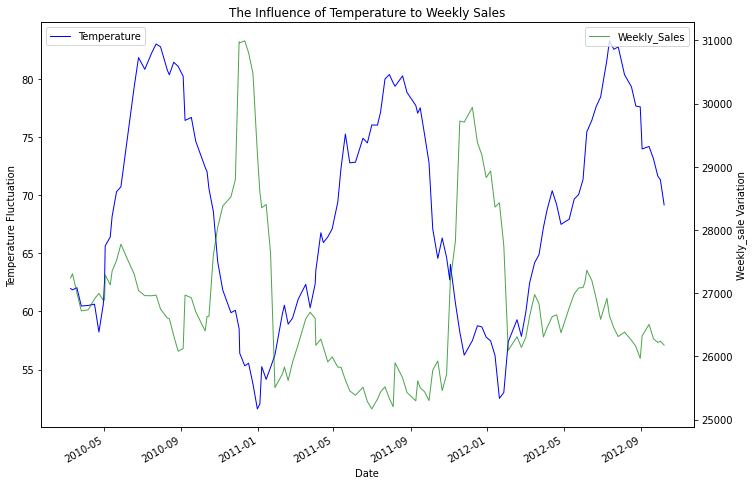

In [ ]:
fig = plt.figure(figsize=(8,6))
ax1 = fig.add_subplot(111)
fig.set_size_inches(11.7,8.27)
rolling['Temperature'].plot(ax=ax1, linewidth='1', color='blue', label='Temperature')
plt.xlabel('Date')
ax1.set_ylabel('Temperature Fluctuation')
plt.legend(loc=2)

ax2 = ax1.twinx()
rolling['Weekly_Sales'].plot(ax=ax2, label='Weekly_Sales', linewidth='1', color='green', alpha=0.7)

ax2.set_ylabel('Weekly_sale Variation')
plt.legend(loc=1)
plt.title('The Influence of Temperature to Weekly Sales')

### 2.3 Question:
What is the effect of whether holiday or not on the average sales in different stores?
- It is clearly shown in the table that the average sales in the store are generally higher on holidays. For instance, the highest average sale on holiday is 31106.99 dollars. Compared to that, there is only 29386.52 dollars' sale for 45 stores when not on holiday. The lowest average sale for 45 stores on holiday is 5617.21 dollars, which is more than the lowest value of 5010.25 dollars when not on vacation. Obviously, in the Q3-Figure 1, the line of average weekly sales on holiday above the line of average weekly sales not on holiday showing in the plot. Moreover, we created a plot, the Q3-Figure 2, to comparing the gap between the average weekly sales during holiday and non-holiday. In this chart, all the points are positive, which means that the average weekly sales on holiday are higher than the average sales not on holiday in each store.
- Conclusion: Therefore, holiday is a major factor to affect sales. We think that stores can take some actions to take advantage of the holiday such as hold some promotion events during holidays in order to obtain higher sales.


In [ ]:
avg_sales=sales.groupby(['IsHoliday','Store'],as_index=False)['Weekly_Sales'].mean()
avg_sales

,IsHoliday,Store,Weekly_Sales
0,False,1,21609.634733
1,False,2,26753.864227
2,False,3,6332.098604
3,False,4,29032.260570
4,False,5,5010.249172
...,...,...,...
85,True,41,18775.637918
86,True,42,11680.949753
87,True,43,13473.438093
88,True,44,5932.577174


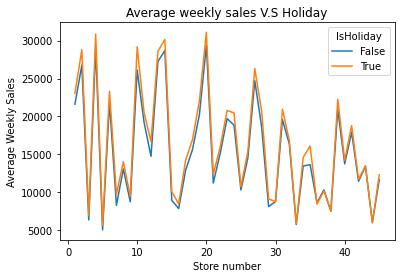

In [ ]:
# Q3-Figure1
sns.despine()
sns.lineplot(x='Store', y='Weekly_Sales', data=avg_sales,hue='IsHoliday')
plt.xlabel('Store number')
plt.ylabel('Average Weekly Sales')
plt.title('Average weekly sales V.S Holiday')
plt.show()

In [ ]:
# Difference b/w avg_sales on holiday and not on holiday
not_holiday=avg_sales[avg_sales['IsHoliday']==False]
is_holiday=avg_sales[avg_sales['IsHoliday']==True]
dif=pd.merge(not_holiday,is_holiday,how= 'inner',on=['Store'])
dif['diff']=dif['Weekly_Sales_y']-dif['Weekly_Sales_x']

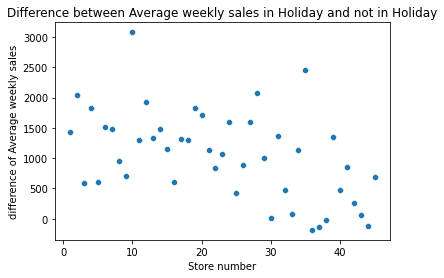

In [ ]:
# Q3-Figure2
import matplotlib.pyplot as plt
import seaborn as sns
sns.scatterplot(x='Store', y='diff', data=dif,)
plt.xlabel('Store number')
plt.ylabel('difference of Average weekly sales')
plt.title('Difference between Average weekly sales in Holiday and not in Holiday')
plt.show()

### 2.4 Question:
What is the relationship between temperature and average weekly sales during holidays and during non-holiday?

- Explanation: From Table 1, we can see that the correlation value between temperature and average weekly sales on holiday is -0.031829, which shows a weak or no relationship between average weekly sales and temperature during the holiday; Similarity, in Table 2. The correlation value between temperature and average weekly sales not on holiday is -0.020894, which shows a weak or no relationship between average weekly sales and temperature not on holiday.

- To have a better visual effect, we created a Figure1 to visualize the result of investigating whether there is any relationship between average weekly sales and temperature on holiday and not on holiday. There are 45 orange points and 45 blue points describes the different sales values in each store. Also, the orange point represents the sales that occur on holiday, and the blue one is the sales that occur on non-holiday. Overall, the temperature during holidays is lower than that during non-holidays, but we can compare average weekly sales values in similar temperature ranges. Specifically, there is no pattern showing in the graph when the temperature in the range of 40°F to 60°F. It means that sales did not change a lot, whether it’s a holiday or not, and no matter the temperature is 40 degrees Fahrenheit or 60 degrees Fahrenheit. Therefore, there is no significant difference between the average weekly sales on holidays and sales on non-holidays.

- Conclusion: The temperature may affect the sales in but it is not a major reason to influence store sales given by on holiday or on non-holiday. To a certain degree, consumer may not particularly care about the weather if they willing to go shopping during the holiday. Thus, we suggest that stores can appropriately to consider the impact of temperature when they need to hold some promotion events or other activities during holiday.

In [ ]:
q4=features.merge(sales,on=['Store','Date','IsHoliday'], how='inner')

In [ ]:
avg_sales2=q4.groupby(['IsHoliday','Store'],as_index=False)[['Weekly_Sales','Temperature']].mean()

In [ ]:
is_holiday=avg_sales2[avg_sales2['IsHoliday']==True]
is_holiday.head()

,IsHoliday,Store,Weekly_Sales,Temperature
45,True,1,23039.386667,57.941024
46,True,2,28798.710526,57.382299
47,True,3,6916.446288,62.839874
48,True,4,30854.231417,49.500289
49,True,5,5617.212609,59.195344


In [ ]:
not_holiday=avg_sales2[avg_sales2['IsHoliday']==False]
not_holiday.head()

,IsHoliday,Store,Weekly_Sales,Temperature
0,False,1,21609.634733,69.005361
1,False,2,26753.864227,68.919023
2,False,3,6332.098604,71.935826
3,False,4,29032.260570,63.142386
4,False,5,5010.249172,69.969895


In [ ]:
# Q4-Table1:
# Correlation table (Temp and sales on holiday)
corr=is_holiday.corr(method='pearson')
corr1=corr.drop('IsHoliday',axis=0)
corr2=corr1.drop('IsHoliday',axis=1)
corr2

,Weekly_Sales,Temperature
Weekly_Sales,1.000000,-0.031829
Temperature,-0.031829,1.000000


In [ ]:
# Q4-Table2:
# Correlation table (Temp and sales on-non holiday)
corr3=not_holiday.corr(method='pearson')
corr4=corr3.drop('IsHoliday',axis=0)
corr5=corr4.drop('IsHoliday',axis=1)
corr5

,Weekly_Sales,Temperature
Weekly_Sales,1.000000,-0.020894
Temperature,-0.020894,1.000000


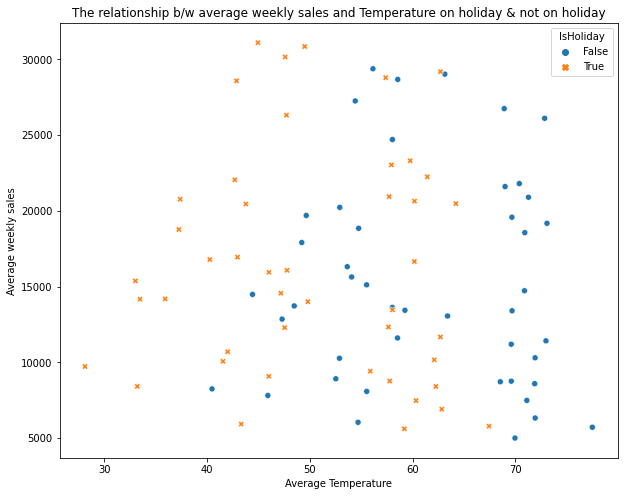

In [ ]:
# Q4-Figure1:the relationship b/w average sales and temperature on holiday and not on holiday
plt.figure(figsize=(10, 8))
sns.scatterplot(x='Temperature', y='Weekly_Sales', data=avg_sales2, hue='IsHoliday',style='IsHoliday',edgecolors='purple')
plt.xlabel('Average Temperature')
plt.ylabel('Average weekly sales')
plt.title('The relationship b/w average weekly sales and Temperature on holiday & not on holiday')
plt.show()

### 2.5 Question:
What is the influence of the type and size of stores on department sales?
- Explanation: As we see in the stores-data set, different stores have their different types (A, B, or C) and different sizes. These parameters have different effects on the sales of those stores.
- Conclusion: Type A is the largest store. From the pie chart, we can say that number of stores in type A is more than B and C. Also the boxplot average sales for A is the highest and C store is the lowest. Average weekly sales for type A that is the largest is 21,436 and for type C the average weekly sales are 9,442. In the third boxplot we notice that the number of A-type stores is more than B and C. Also besides that the size of A-type stores is larger than type B and C. Therefore the average weekly sales for type A is more than type B and type B is more than type C. By viewing the bar chart for the relationship between the average size of the stores and the average weekly sales we can see that there is a relative relationship between the size and the weekly sales. In general, as the size of the stores grows in the bar chart the weekly sales on average becomes higher. We recommend that stores that are in smaller sizes plan to scale their size to extend their sales. In the following part for each type (A, B, and C) that are in different sizes we notice that for Type A that is the largest the relationship between size and sales is relatively stronger than type B that is smaller in size. Therefore we can say that for stores of a larger size this relationship becomes stronger. For instance, for A-type stores, the ratio of sales on size is larger. Also, the value for R-square for A type stores is larger than for type B and C. Also in larger size stores the growth of sales is higher than smaller size stores.

In [ ]:
sales_q5 = sales[['Store','Dept','Weekly_Sales']].copy().dropna()
q5 = sales_q5.merge(stores,on=['Store'],how='inner')
q5_mean = q5.groupby(['Dept','Type'])
q5_mean = q5_mean[['Size','Weekly_Sales']].mean().reset_index()

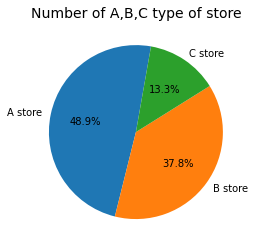

In [ ]:
size = stores.groupby('Type')['Type'].count()
labels = ['A store','B store','C store'];
plt.pie(x=size, autopct="%.1f%%", labels=labels,startangle=80);
plt.title("Number of A,B,C type of store", fontsize=14);

In [ ]:
store_sale = q5[['Type','Weekly_Sales']]
store_size = q5[['Type','Size']]

In [ ]:
store_sale_A = store_sale[store_sale['Type'] == 'A']['Weekly_Sales']
store_sale_B = store_sale[store_sale['Type'] == 'B']['Weekly_Sales']
store_sale_C = store_sale[store_sale['Type'] == 'C']['Weekly_Sales']
List = [store_sale_A,store_sale_B,store_sale_C]

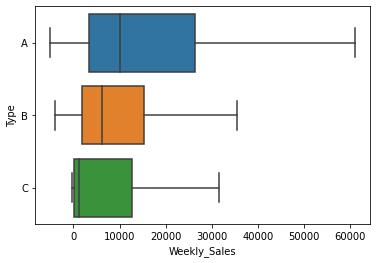

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
fig.set_size_inches(11.7,8.27)
fig1 = sns.boxplot(x='Weekly_Sales', y='Type', data=store_sale,showfliers=False)

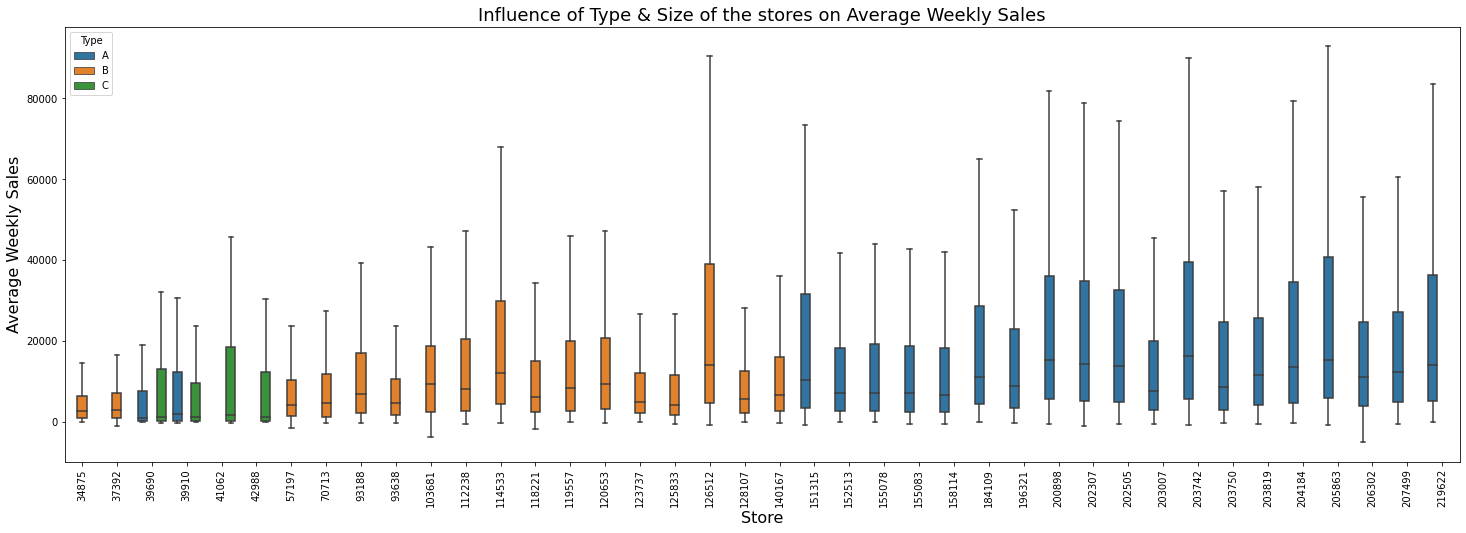

In [ ]:
q5_1=features.merge(sales,on=['Store','Date'], how='inner')
df=q5_1.merge(stores,on='Store',how='inner')
data = pd.concat([df['Size'], df['Weekly_Sales'], df['Type']], axis=1)
f, ax = plt.subplots(figsize=(25, 8))
fig = sns.boxplot(x='Size', y='Weekly_Sales', data=df, showfliers=False, hue="Type")
plt.xticks(rotation=90)
plt.title('Influence of Type & Size of the stores on Average Weekly Sales', fontsize=18)
plt.ylabel('Average Weekly Sales', fontsize=16)
plt.xlabel('Store', fontsize=16)
plt.show()

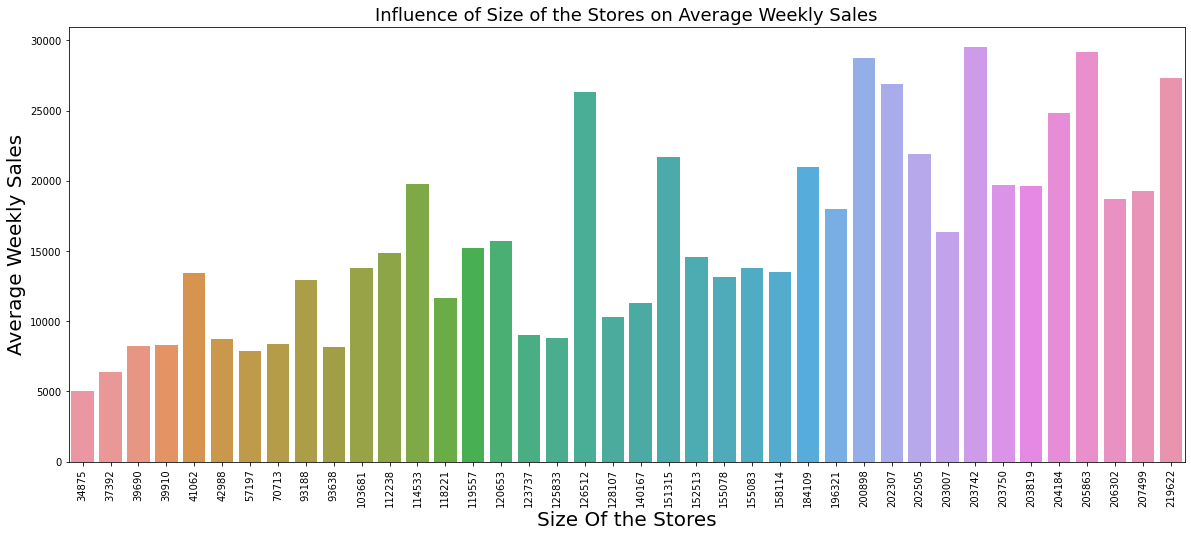

In [ ]:
q5_1=features.merge(sales,on=['Store','Date'], how='inner')
df=q5_1.merge(stores,on='Store',how='inner')
weekly_sales = df.groupby(['Size'])['Weekly_Sales'].mean().reset_index()
plt.figure(figsize=(20,8))
sns.barplot(x='Size',y='Weekly_Sales',data=weekly_sales)
plt.xticks(rotation=90)
plt.title('Influence of Size of the Stores on Average Weekly Sales', fontsize=18)
plt.ylabel('Average Weekly Sales', fontsize=20)
plt.xlabel('Size Of the Stores', fontsize=20)
plt.show()

### 2.6 Question:
What is the influence of markdowns and department sales?
- Explanation: The markdowns are one of the measures which store adopts to promote sales and maximize their profit. In this question, we will measure the effect of five anonymous markdowns on weekly_sales separately. 
- Conclusion: The figure in Q6 illustrates the correlation between markdowns and weekly sales. A trendline is added to the scatter plot to summarize the relationship between MarkDown and Weekly Sales. Markdown is positively correlated with weekly sales as shown by the trendline. High weekly sales are more concentrated in the region where markdown is close to 0. However, the increase of MarkDown1-5 and Markdown sum have little effect on weekly sales. In conclusion, a small value in markdown is associated with higher sales.

In [ ]:
# Data for Q6
features_q6 = features.copy()

sales_q6 = sales.copy()

In [ ]:
features_q6 = features_q6[['Store','Date','MarkDown1','MarkDown2','MarkDown3','MarkDown4','MarkDown5']].dropna()
sales_q6 = sales_q6.groupby(['Store','Date'],as_index=False).agg({'Weekly_Sales': 'sum'})
features_sales = sales_q6.merge(features_q6, on = ['Store','Date'])
features_sales['MarkDownSum'] = features_sales['MarkDown1']+features_sales['MarkDown2'] \
                                +features_sales['MarkDown3']+features_sales['MarkDown4']+features_sales['MarkDown5']

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning

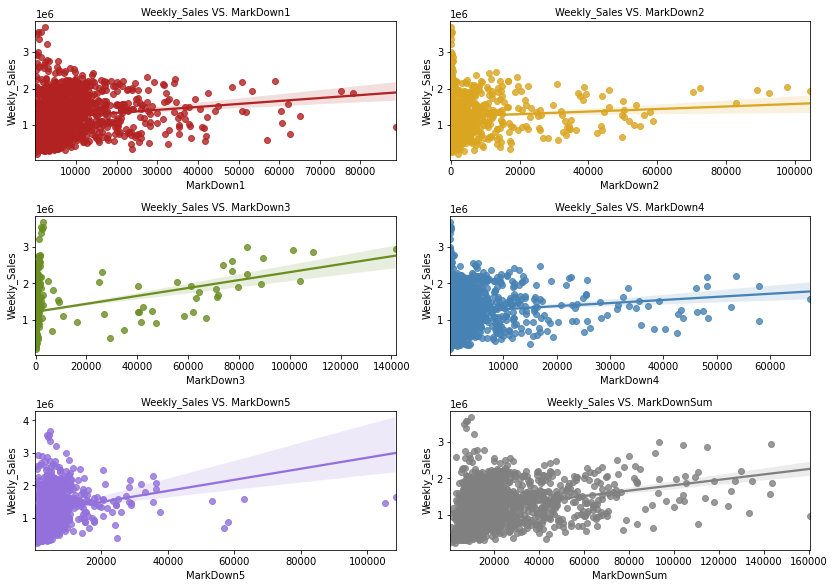

In [ ]:
fig,ax = plt.subplots(3,2)
fig.set_size_inches(11.7,8.27)
ax1, ax2, ax3, ax4, ax5, ax6 = ax.flatten()

def subplot(feature,ax,color):
    ax.set_title('Weekly_Sales VS. {}'.format(feature),fontsize = 10)
    ax.set(xlabel=feature,ylabel='Weekly_Sales')
    sns.regplot(features_sales[feature],features_sales['Weekly_Sales'],ax=ax,color=color)

subplot('MarkDown1',ax1,'firebrick')
subplot('MarkDown2',ax2,'goldenrod')
subplot('MarkDown3',ax3,'olivedrab')
subplot('MarkDown4',ax4,'steelblue')
subplot('MarkDown5',ax5,'mediumpurple')
subplot('MarkDownSum',ax6,'grey')

fig.tight_layout()

## 3. Machine Learning
In this section, we are trying to select influencial features for weekly sales. Then we will use selected features to construct machine learning models. We will compare three common machine learning models - Linear Regression, Random Forest, XGboost - and make predictions based on the most accurate model. There are three steps in this section:
- Correlation Matrix
- Feature Selection & Random Forest
- Model Comparsion: Linear Regression, Random Forest, XGboost

### 3.1 Correlation Matrix
- Explanation: The correlation matrix is used to check the correlation between different features and weekly sales. It is a straightforward way to illustrate the patterns in the dataset. 
- Conclusion: 'Size' is correlated with and 'Type' of store (with a correlation coefficient of -0.81). Other than that, there is no clear correlation between variables. The correlation between major features and 'Weekly_Sales' is weak. Therefore, any feature itself is not sufficient for weekly sales prediction.

In [ ]:
# Merge data
df=pd.merge(sales,features, on=['Store','Date','IsHoliday'])
df=pd.merge(df,stores, on=['Store'])
types_encoded, types =df['Type'].factorize()
df['Type'] = types_encoded

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 421570 entries, 0 to 421569
Data columns (total 16 columns):
 #   Column        Non-Null Count   Dtype         
---  ------        --------------   -----         
 0   Store         421570 non-null  int64         
 1   Dept          421570 non-null  category      
 2   Date          421570 non-null  datetime64[ns]
 3   Weekly_Sales  421570 non-null  float64       
 4   IsHoliday     421570 non-null  bool          
 5   Temperature   421570 non-null  float64       
 6   Fuel_Price    421570 non-null  float64       
 7   MarkDown1     150681 non-null  float64       
 8   MarkDown2     111248 non-null  float64       
 9   MarkDown3     137091 non-null  float64       
 10  MarkDown4     134967 non-null  float64       
 11  MarkDown5     151432 non-null  float64       
 12  CPI           421570 non-null  float64       
 13  Unemployment  421570 non-null  float64       
 14  Type          421570 non-null  int64         
 15  Size          421

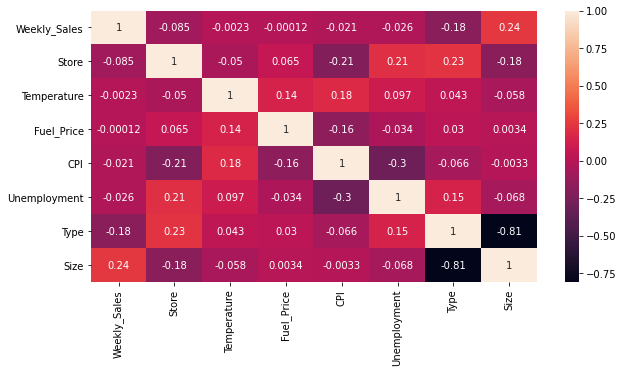

In [ ]:
fig, ax = plt.subplots(figsize=(10,5))
df = df[['Weekly_Sales','Store','Temperature','Fuel_Price','CPI','Unemployment','Type','Size']]
sns.heatmap(df.corr(),annot=True);

### 3.2 Feature Selection

- Explaination: We used Random Forest algorithm to evaluate the importance of features on the retail dataset. The blue bars indicate how strong the relative importance of each feature is when making a prediction.

- Conclusion: According to the plot, we can see that there are 9 features are more informative(department, size, store, week, MarkDown3, type, CPI, Unemployment and temperature), while the remaining are not. So it means that these nine variables especially for department, size, store, those three are the most importantly when making a prediction for our dataset.

In [ ]:
df=q4.merge(stores,on='Store',how='inner')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 421570 entries, 0 to 421569
Data columns (total 16 columns):
 #   Column        Non-Null Count   Dtype         
---  ------        --------------   -----         
 0   Store         421570 non-null  int64         
 1   Date          421570 non-null  datetime64[ns]
 2   Temperature   421570 non-null  float64       
 3   Fuel_Price    421570 non-null  float64       
 4   MarkDown1     150681 non-null  float64       
 5   MarkDown2     111248 non-null  float64       
 6   MarkDown3     137091 non-null  float64       
 7   MarkDown4     134967 non-null  float64       
 8   MarkDown5     151432 non-null  float64       
 9   CPI           421570 non-null  float64       
 10  Unemployment  421570 non-null  float64       
 11  IsHoliday     421570 non-null  bool          
 12  Dept          421570 non-null  category      
 13  Weekly_Sales  421570 non-null  float64       
 14  Type          421570 non-null  object        
 15  Size          421

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
df=q4.merge(stores,on='Store',how='inner')
#import datetime as dt
df["Month"] = df['Date'].dt.month
df["Year"] = df['Date'].dt.year
df["WeekofYear"] = df['Date'].dt.weekofyear
df.drop(['Date'],
        axis=1, inplace=True)
params = {'random_state': 0, 'n_jobs': 4, 'n_estimators': 5000, 'max_depth': 8}
# One-hot encode
df=df.astype({'Dept':'str'})
dfml = pd.get_dummies(df,columns=["Type","Month","Year","WeekofYear","Dept","Store","IsHoliday"],drop_first=True)
dfml.rename(columns={'IsHoliday_True': 'IsHoliday'}, inplace=True) 
dfml.head()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:10: FutureWarning:

Series.dt.weekofyear and Series.dt.week have been deprecated.  Please use Series.dt.isocalendar().week instead.



,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,Weekly_Sales,Size,Type_B,Type_C,Month_2,Month_3,Month_4,Month_5,Month_6,Month_7,Month_8,Month_9,Month_10,Month_11,Month_12,Year_2011,Year_2012,WeekofYear_2,WeekofYear_3,WeekofYear_4,WeekofYear_5,WeekofYear_6,WeekofYear_7,WeekofYear_8,WeekofYear_9,WeekofYear_10,WeekofYear_11,WeekofYear_12,WeekofYear_13,WeekofYear_14,WeekofYear_15,...,Store_7,Store_8,Store_9,Store_10,Store_11,Store_12,Store_13,Store_14,Store_15,Store_16,Store_17,Store_18,Store_19,Store_20,Store_21,Store_22,Store_23,Store_24,Store_25,Store_26,Store_27,Store_28,Store_29,Store_30,Store_31,Store_32,Store_33,Store_34,Store_35,Store_36,Store_37,Store_38,Store_39,Store_40,Store_41,Store_42,Store_43,Store_44,Store_45,IsHoliday
0,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,24924.50,151315,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,50605.27,151315,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,13740.12,151315,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,39954.04,151315,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,32229.38,151315,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [ ]:
dfml.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 421570 entries, 0 to 421569
Columns: 202 entries, Temperature to IsHoliday
dtypes: float64(10), int64(1), uint8(191)
memory usage: 115.4 MB


In [ ]:
# Fit RandomForest Classifier
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.utils import shuffle
dfml=dfml.fillna(0)
dfml=shuffle(dfml)
# Labels are the values we want to predict
labels = dfml['Weekly_Sales']
# Remove the labels from the features
# axis 1 refers to the columns
features_selection= dfml.drop('Weekly_Sales', axis = 1)
# Saving feature names for later use
feature_list = list(features_selection.columns)

# Split the data into training and testing sets
train_features, test_features, train_labels, test_labels = train_test_split(features_selection, labels, test_size = 0.6, random_state = 42)
print('Training Features Shape:', train_features.shape)
print('Training Labels Shape:', train_labels.shape)
print('Testing Features Shape:', test_features.shape)
print('Testing Labels Shape:', test_labels.shape)

Training Features Shape: (168628, 201)
Training Labels Shape: (168628,)
Testing Features Shape: (252942, 201)
Testing Labels Shape: (252942,)


In [ ]:
# Import the model we are using
from sklearn.ensemble import RandomForestRegressor 
  
# Create regressor object 
rf = RandomForestRegressor(n_estimators = 100, random_state = 42,max_depth=12) 

# Fit the regressor with x and y data 
rf.fit(train_features, train_labels);

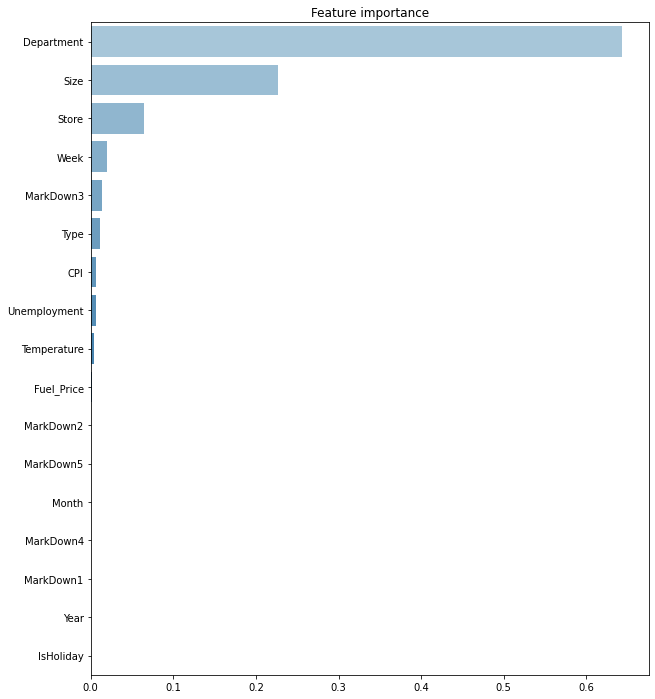

In [ ]:
dept=0
tp=0
week=0
year=0
store=0
month=0
new_imp=[]
new_feature_list=[]
for i in range(rf.feature_importances_.size):
  if 'Dept' in feature_list[i]:
    dept += rf.feature_importances_[i]
  elif 'Type' in feature_list[i]:
    tp += rf.feature_importances_[i]
  elif 'Week' in feature_list[i]:
    week += rf.feature_importances_[i]
  elif 'Year' in feature_list[i]:
    year += rf.feature_importances_[i]
  elif 'Store' in feature_list[i]:
    store += rf.feature_importances_[i]
  elif 'Month' in feature_list[i]:
    month += rf.feature_importances_[i]
  else:
    new_imp.append(rf.feature_importances_[i])
    new_feature_list.append(feature_list[i])
new_imp.append(dept)
new_imp.append(tp)
new_imp.append(week)
new_imp.append(year)
new_imp.append(store)
new_imp.append(month)
new_feature_list.append('Department')
new_feature_list.append('Type')
new_feature_list.append('Week')
new_feature_list.append('Year')
new_feature_list.append('Store')
new_feature_list.append('Month')

imp = pd.Series(data=new_imp, index=new_feature_list).sort_values(ascending=False)
plt.figure(figsize=(10,12))
plt.title("Feature importance")
ax = sns.barplot(y=imp.index, x=imp.values, palette="Blues_d", orient='h')

### 3.3 Model Comparsion: Linear Regression, Random Forest, XGboost
- Explanation: To find the most accurate model in this scenario, we compared the test result in three commonly used machine learning models- linear regression, random forest, and xgBoost. Different combinations of features were used to improve the accuracy of the model.

- Conclusion: Random forest model provides the best result among the three selected models. Though the model accuracy is maximized with all features be put in. Four features- 'Store', 'Dept', 'Size', 'Week of Year'- can provide a decent prediction about sales.

In [ ]:
%%capture
# Impute values for CPI,Unemployment
features['CPI'].fillna((features['CPI'].mean()), inplace=True)
features['Unemployment'].fillna((features['Unemployment'].mean()), inplace=True)

#Impute Markdowns 1-5 based on features + store-wise sales
impute = sales.groupby(['Date','Store'],as_index = False).agg({'Weekly_Sales':'sum'})
impute = impute.merge(features,on=['Date','Store'])

from fancyimpute import IterativeImputer
itt = IterativeImputer()
df = itt.fit_transform(impute[["MarkDown1","MarkDown2","MarkDown3","MarkDown4","MarkDown5"]])
impute.MarkDown1 = df[:,0]
impute.MarkDown2 = df[:,1]
impute.MarkDown3 = df[:,2]
impute.MarkDown4 = df[:,3]
impute.MarkDown5 = df[:,4]

In [ ]:
#Perpare ML data: Imputed features + sales based on department-wise sale + size table
impute.drop('Weekly_Sales',axis = 1,inplace=True)
data_table = pd.merge(impute,sales, on=["Date","Store","IsHoliday"])
data_table = pd.merge(data_table,stores, on=["Store"])

In [ ]:
data_table.isnull().sum()

Date            0
Store           0
Temperature     0
Fuel_Price      0
MarkDown1       0
MarkDown2       0
MarkDown3       0
MarkDown4       0
MarkDown5       0
CPI             0
Unemployment    0
IsHoliday       0
Dept            0
Weekly_Sales    0
Type            0
Size            0
dtype: int64

In [ ]:
# Model Comparison 1: all feature included
data_table1 = data_table.copy()

# Create new column
data_table1["Month"] = data_table1['Date'].dt.month
data_table1["Year"] = data_table1['Date'].dt.year
data_table1["WeekofYear"] = data_table1['Date'].dt.weekofyear
data_table1.drop(['Date'],axis=1,inplace=True)
data_table1['IsHoliday'] = data_table1['IsHoliday'].map({True:0,False:1})

# Create dummies out of categorical column
data_table1 = pd.get_dummies(data_table1,drop_first = True)

# Prepare train and test data
X1 = data_table1.drop('Weekly_Sales',axis=1)
y1 = data_table1['Weekly_Sales']
from sklearn.model_selection import train_test_split
X1_train, X1_test, y1_train, y1_test = train_test_split(X1, y1, test_size = 0.6, random_state = 42)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:7: FutureWarning:

Series.dt.weekofyear and Series.dt.week have been deprecated.  Please use Series.dt.isocalendar().week instead.



In [ ]:
# Model Comparison 2: top 8 important features ('Type' is removed since it is correlated with 'Size')
data_table2 = data_table.copy()

# Create and select features
data_table2["WeekofYear"] = data_table2['Date'].dt.weekofyear
data_table2 = data_table2[['Store','Dept','Size','MarkDown3','CPI','Unemployment','Weekly_Sales','Temperature','WeekofYear']]

# Create dummies out of categorical column
data_table2 = pd.get_dummies(data_table2,drop_first = True)

# Prepare train and test data
X2 = data_table2.drop('Weekly_Sales',axis=1)
y2 = data_table2['Weekly_Sales']
from sklearn.model_selection import train_test_split
X2_train, X2_test, y2_train, y2_test = train_test_split(X2, y2, test_size = 0.6, random_state = 42)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:5: FutureWarning:

Series.dt.weekofyear and Series.dt.week have been deprecated.  Please use Series.dt.isocalendar().week instead.



In [ ]:
# Model Comparison 3: 4 most important features ('Store','Dept','Size',WeekofYear','MarkDown3','CPI','Unemployment') to feed in model
data_table3 = data_table.copy()

# Create and select features
data_table3["WeekofYear"] = data_table3['Date'].dt.weekofyear
data_table3 = data_table3[['Store','Dept','Size','Weekly_Sales','WeekofYear']]

# Create dummies out of categorical column
data_table3 = pd.get_dummies(data_table3,drop_first = True)

# Prepare train and test data
X3 = data_table3.drop('Weekly_Sales',axis=1)
y3 = data_table3['Weekly_Sales']
from sklearn.model_selection import train_test_split
X3_train, X3_test, y3_train, y3_test = train_test_split(X3, y3, test_size = 0.6, random_state = 42)


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:5: FutureWarning:

Series.dt.weekofyear and Series.dt.week have been deprecated.  Please use Series.dt.isocalendar().week instead.



In [ ]:
import numpy as np
from sklearn.metrics import mean_squared_error
name = []
MC = []
score = []
models = []
rmse = []
X_train = [X1_train,X2_train,X3_train]
y_train = [y1_train,y2_train,y3_train]
X_test = [X1_test,X2_test,X3_test]
y_test = [y1_test,y2_test,y3_test]

#Linear Regression
from sklearn.linear_model import LinearRegression
lg = LinearRegression()
for i in range(3):
  lg.fit(X_train[i], y_train[i])
  MC.append(i+1)
  name.append(type(lg).__name__)
  score.append(lg.score(X_test[i], y_test[i]))
  models.append(lg)
  rmse.append(np.sqrt(mean_squared_error(lg.predict(X_test[i]), y_test[i])))

In [ ]:
#Random Forest Regression
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor()
for i in range(3):
  rf.fit(X_train[i], y_train[i])
  MC.append(i+1)
  name.append(type(rf).__name__)
  score.append(rf.score(X_test[i], y_test[i]))
  models.append(rf)
  rmse.append(np.sqrt(mean_squared_error(rf.predict(X_test[i]), y_test[i])))

In [ ]:
#xgBoost Regression
import xgboost as xgb
xgBoost = xgb.XGBRegressor()
for i in range(3):
  xgBoost.fit(X_train[i], y_train[i])
  MC.append(i+1)
  name.append(type(xgBoost).__name__)
  score.append(xgBoost.score(X_test[i], y_test[i]))
  models.append(xgBoost)
  rmse.append(np.sqrt(mean_squared_error(xgBoost.predict(X_test[i]), y_test[i])))

[20:00:33] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[20:01:13] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[20:01:48] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


In [ ]:
df_score = pd.DataFrame(list(zip(name, MC, rmse, score, models)),columns=['name','ML','rmse','score',"model"])
df_score.set_index('name',inplace=True)
df_score

,ML,rmse,score,model
name,,,,
LinearRegression,1,13778.267069,0.630256,"LinearRegression(copy_X=True, fit_intercept=Tr..."
LinearRegression,2,13823.077635,0.627847,"LinearRegression(copy_X=True, fit_intercept=Tr..."
LinearRegression,3,13870.693411,0.625278,"LinearRegression(copy_X=True, fit_intercept=Tr..."
RandomForestRegressor,1,5108.405890,0.949174,"(DecisionTreeRegressor(ccp_alpha=0.0, criterio..."
RandomForestRegressor,2,5130.174415,0.948740,"(DecisionTreeRegressor(ccp_alpha=0.0, criterio..."
RandomForestRegressor,3,5987.052896,0.930187,"(DecisionTreeRegressor(ccp_alpha=0.0, criterio..."
XGBRegressor,1,12222.436935,0.709044,"XGBRegressor(base_score=0.5, booster='gbtree',..."
XGBRegressor,2,12172.842121,0.711400,"XGBRegressor(base_score=0.5, booster='gbtree',..."
XGBRegressor,3,12288.439155,0.705893,"XGBRegressor(base_score=0.5, booster='gbtree',..."


## 4. Conclusion

- Size, department, and location for a store: Location, department, and size are not only three essential attributes for a store but also the most powerful features that influence a store's sale. To maximize the sale, the overall size for stores in a favorable location should be promised to meet the high demand. Moreover, the size of the more lucrative department should be prioritized during the store allocating process.
- Market strategy at right time: Week of year is another influencial feature for a store's sale. It is important for store to hold promotion events when stores are in their best sales’ week. In addition to discount, stores can stimulate consumption by diversifying the product they provided. This can be done by methods such as creating packages & bundles for product and providing product for special occasions or seasons. 
- Markdown: After the best sales' week, stores can take high-strength promotions product's price to avoid massive loss when stocks that have been hoarded for a long time or are about to expire.
